In [1]:
#make logarithmic bins
#mass is in units of 10e10 M_solar
#distances are in Kpc
#make circular velocity profile

#standard imports
from pygadgetreader import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

#setting matplotlib parameters
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

In [2]:
#set matplotlib global font size
matplotlib.rcParams['font.size']=14

In [12]:
#reading in the data
snap_folder = '/home/ryan/projects/Medvedev/snaps/run_09112020/'
snap = snap_folder + 'snap_002'

readheader(snap, 'header')

{'npartThisFile': array([     0, 262144,      0,      0,      0,      0], dtype=uint32),
 'npartTotal': array([     0, 262144,      0,      0,      0,      0], dtype=uint32),
 'npartTotalHW': array([0, 0, 0, 0, 0, 0], dtype=uint32),
 'ngas': 0,
 'ndm': 262144,
 'ndisk': 0,
 'nbulge': 0,
 'nstar': 0,
 'nbndry': 0,
 'massTable': array([0.        , 4.10273037, 0.        , 0.        , 0.        ,
        0.        ]),
 'time': 0.09988763226712673,
 'nfiles': 1,
 'redshift': 9.011249413998799,
 'boxsize': 50000.0,
 'O0': 0.31,
 'Ol': 0.69,
 'h': 0.67,
 'flag_cooling': 0,
 'flag_sfr': 0,
 'flag_fb': 0,
 'flag_fh2': 0,
 'flag_age': 0,
 'flag_metals': 0,
 'flag_potential': 0,
 'flag_delaytime': 0,
 'flag_tmax': 0,
 'rhocrit': 2.6286488787779528e-27}

In [13]:
#extracting position and mass for all particles
#gas_pos = readsnap(snap, 'pos', 'gas')
#gas_mass = readsnap(snap, 'mass', 'gas')

dm_pos = readsnap(snap, 'pos', 'dm')
dm_mass = readsnap(snap, 'mass', 'dm')

Returning DM    Positions
Returning DM    Mass


In [14]:
#extracting coordinates
#gas_x = gas_pos[:, 0]
#gas_y = gas_pos[:, 1]
#gas_z = gas_pos[:, 2]

dm_x = dm_pos[:, 0]
dm_y = dm_pos[:, 1]
dm_z = dm_pos[:, 2]

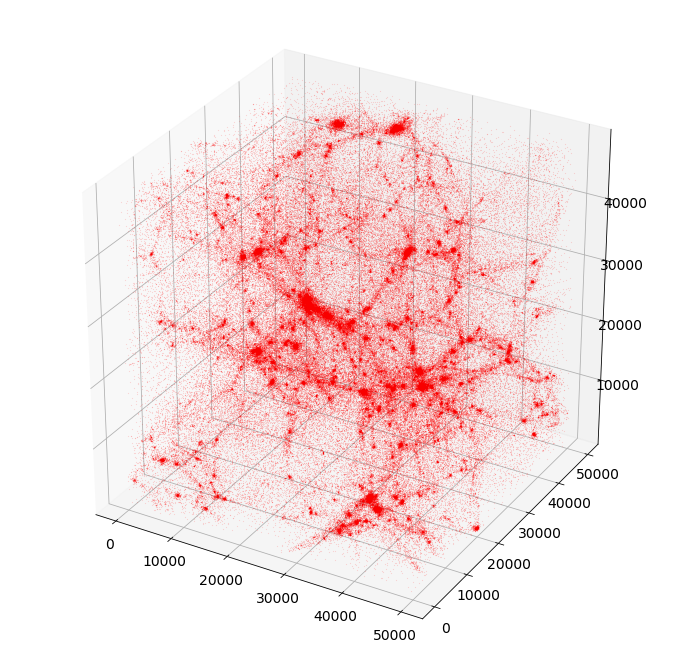

In [15]:
#plotting the positions

fig = plt.figure(figsize=[12,12])

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot3D(dm_x, dm_y, dm_z,'o', color='r',markersize=0.1, alpha=0.5)
#ax.plot3D(gas_x, gas_y, gas_z, 'o', color='b', markersize=0.1, alpha=0.5)
#ax.set_xlim3d(-300, 300)
#ax.set_ylim3d(-300, 300)
#ax.set_zlim3d(-300, 300)

In [7]:
#calculate total mass
total_mass = np.sum(gas_mass) + np.sum(dm_mass)

total_mass

126.30306

In [8]:
#calculate x_cm
x_cm = (np.sum(gas_mass * gas_x) + np.sum(dm_mass * dm_x)) / total_mass
x_cm

0.1628702

In [9]:
#caluclate y_cm
y_cm = (np.sum(gas_mass * gas_y) + np.sum(dm_mass * dm_y)) / total_mass
y_cm

0.2056121

In [10]:
#calculate z_cm
z_cm = (np.sum(gas_mass * gas_z) + np.sum(dm_mass * dm_z)) / total_mass
z_cm

0.12283299

(-300, 300)

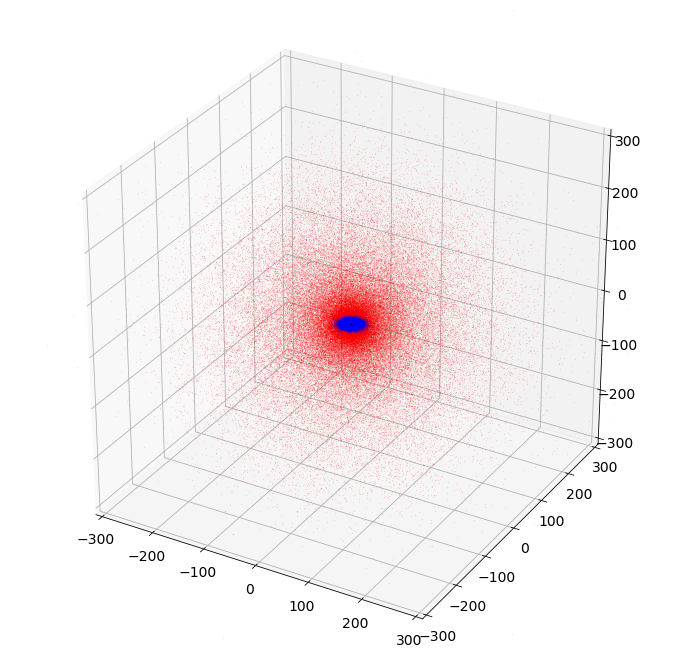

In [11]:
#plotting the positions, now with CM

fig = plt.figure(figsize=[12,12])

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot3D(dm_x, dm_y, dm_z,'o', color='r',markersize=0.1, alpha=0.5)
ax.plot3D(gas_x, gas_y, gas_z, 'o', color='b', markersize=0.1, alpha=0.5)

ax.plot3D([x_cm], [y_cm], [z_cm], 'o', color='k', markersize=1)

ax.set_xlim3d(-300, 300)
ax.set_ylim3d(-300, 300)
ax.set_zlim3d(-300, 300)

In [12]:
#convert to solar masses

gas_mass_solar = gas_mass * 10e10
dm_mass_solar = dm_mass * 10e10

#convert to pc
gas_x_pc = gas_x * 10e3
gas_y_pc = gas_y * 10e3
gas_z_pc = gas_z * 10e3

dm_x_pc = dm_x * 10e3
dm_y_pc = dm_y * 10e3
dm_z_pc = dm_z * 10e3

x_cm_pc = x_cm * 10e3
y_cm_pc = y_cm * 10e3
z_cm_pc = z_cm * 10e3

In [13]:
#calculate radii

gas_radius = np.sqrt((gas_x_pc - x_cm_pc)**2 + (gas_y_pc - y_cm_pc)**2 + (gas_z_pc - z_cm_pc)**2)
dm_radius = np.sqrt( (dm_x_pc - x_cm_pc)**2 + (dm_y_pc - y_cm_pc)**2 + (dm_z_pc - z_cm_pc)**2)

In [30]:
#create the radius bins
radius_bins = []

n_bins = 200

for i in range( n_bins ):
    
    radius = np.power(2, i/2)
    
    radius_bins.append(radius)
    

radius_bins = np.array(radius_bins)

The circular velocity is given by
$$V_{circ} = \sqrt{ \frac{G M_{in}}{R} }$$
If $M_{in}$ is given in solar masses, $R$ in parsecs, and time in Myr, then
$$G = 4.5 \times 10^{-3}$$
Which gives $V_{circ}$ in $km/s$

In [31]:
#Getting the mass within each radius bin

M_in = []

for rbin in radius_bins:
    dm_mass_inside = np.sum(dm_mass_solar[ dm_radius < rbin ])
    gas_mass_inside = np.sum(gas_mass_solar[ gas_radius < rbin ])
    
    total_mass_inside = dm_mass_inside + gas_mass_inside
    
    M_in.append(total_mass_inside)
    
M_in = np.array(M_in)

In [32]:
#calucluating the circular velocity
G = 4.5 * 10e-3

V_circ = np.sqrt( G * M_in / radius_bins )

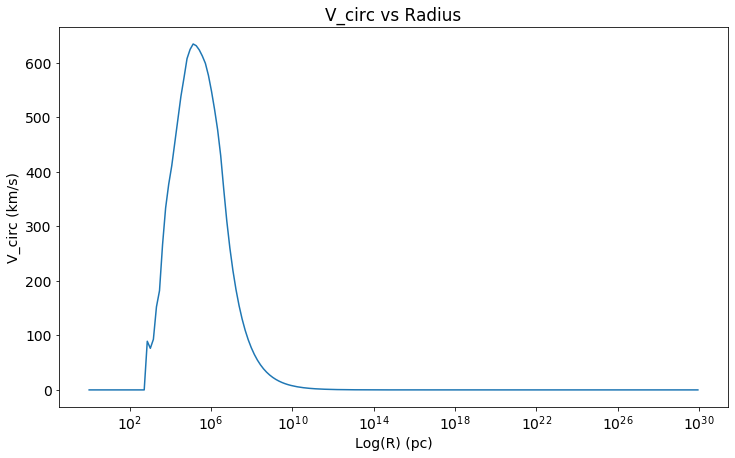

In [33]:
#plotting the result
plt.figure(figsize=[12,7])
plt.semilogx(radius_bins, V_circ)
plt.title('V_circ vs Radius')
plt.xlabel('Log(R) (pc)')
plt.ylabel('V_circ [km s$^{-1}$]')
plt.savefig('circular_velocity.png')
plt.show()

In [34]:
#calculating the density at each radius

volume = (4/3) * np.pi * radius_bins**3

density = M_in / volume

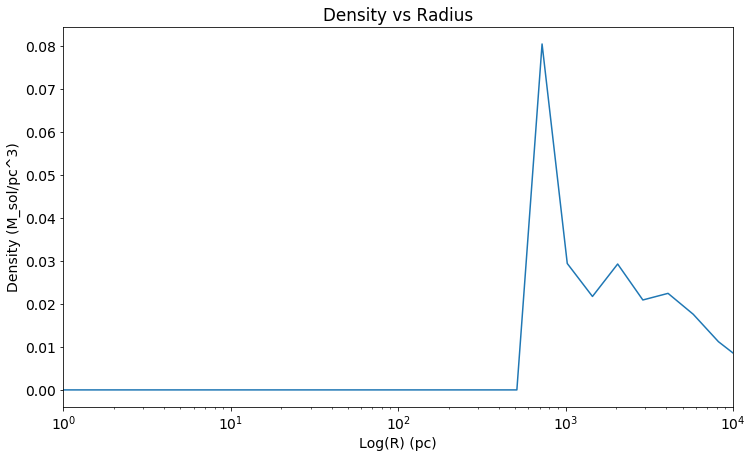

In [35]:
#plotting the result
plt.figure(figsize=[12,7])
plt.semilogx(radius_bins, density)
plt.title('Density vs Radius')
plt.xlabel('Log(R) (pc)')

plt.xlim(1, 10e3)

plt.ylabel('Density (M_sol/pc^3)')
plt.savefig('density_profile.png')
plt.show()

